In [5]:
import pandas as pd
from yellowbrick.classifier.rocauc import roc_auc
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as m
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages as pdfp
from sklearn.metrics import roc_auc_score as auc;

In [ ]:
#Run this line if you are in local
dataset = pd.read_csv("Dataset-Cured.csv", delimiter= ";")
dataset


,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,1
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,1
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,1
4689,1,42,"4,44","35,3",12,27,34,7940,202,1


In [6]:
# run this line if you are using google colab for cloud data mining

url = 'https://drive.google.com/file/d/1SsOFZ7FlBojQSqYdUN-2DhLB2TsEHZuH/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

dataset = pd.read_csv(path, delimiter = ';')
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,"3,14","27,9","9,3","29,6","33,3",14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,"4,74","38,3","12,6","26,6","32,9",10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,"3,85","33,7","11,2","29,1","33,2",10200,314,1
4687,1,56,"4,53","39,5","13,6",30,"34,4",16270,341,1
4688,1,58,"6,07","38,7","11,8","19,4","30,5",10670,224,1
4689,1,42,"4,44","35,3",12,27,34,7940,202,1


In [ ]:
# change the ',' into '.' in the float datatype
dataset = dataset.replace(',', '.', regex = True)
dataset

,gender,age,eritrosit,hematokrit,hemoglobin,hermch,khermchc,leukosit,trombosit,cured
0,0,62,3.14,27.9,9.3,29.6,33.3,14630,291,1
1,1,48,305,257,85,279,331,25400,200,1
2,0,68,310,249,86,277,345,24690,177,1
3,0,62,4.74,38.3,12.6,26.6,32.9,10700,263,1
4,1,58,297,268,92,310,343,10370,217,0
...,...,...,...,...,...,...,...,...,...,...
4686,1,60,3.85,33.7,11.2,29.1,33.2,10200,314,1
4687,1,56,4.53,39.5,13.6,30,34.4,16270,341,1
4688,1,58,6.07,38.7,11.8,19.4,30.5,10670,224,1
4689,1,42,4.44,35.3,12,27,34,7940,202,1


In [ ]:
x = dataset.drop('cured', axis = 1)
y = dataset['cured']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=7)
clf = clf.fit(x_train,y_train)
predictions_test = clf.predict(x_test)
predictions_train = clf.predict(x_train)

fn = x_train.columns.tolist()
cn= y_train.unique().astype('str').tolist()

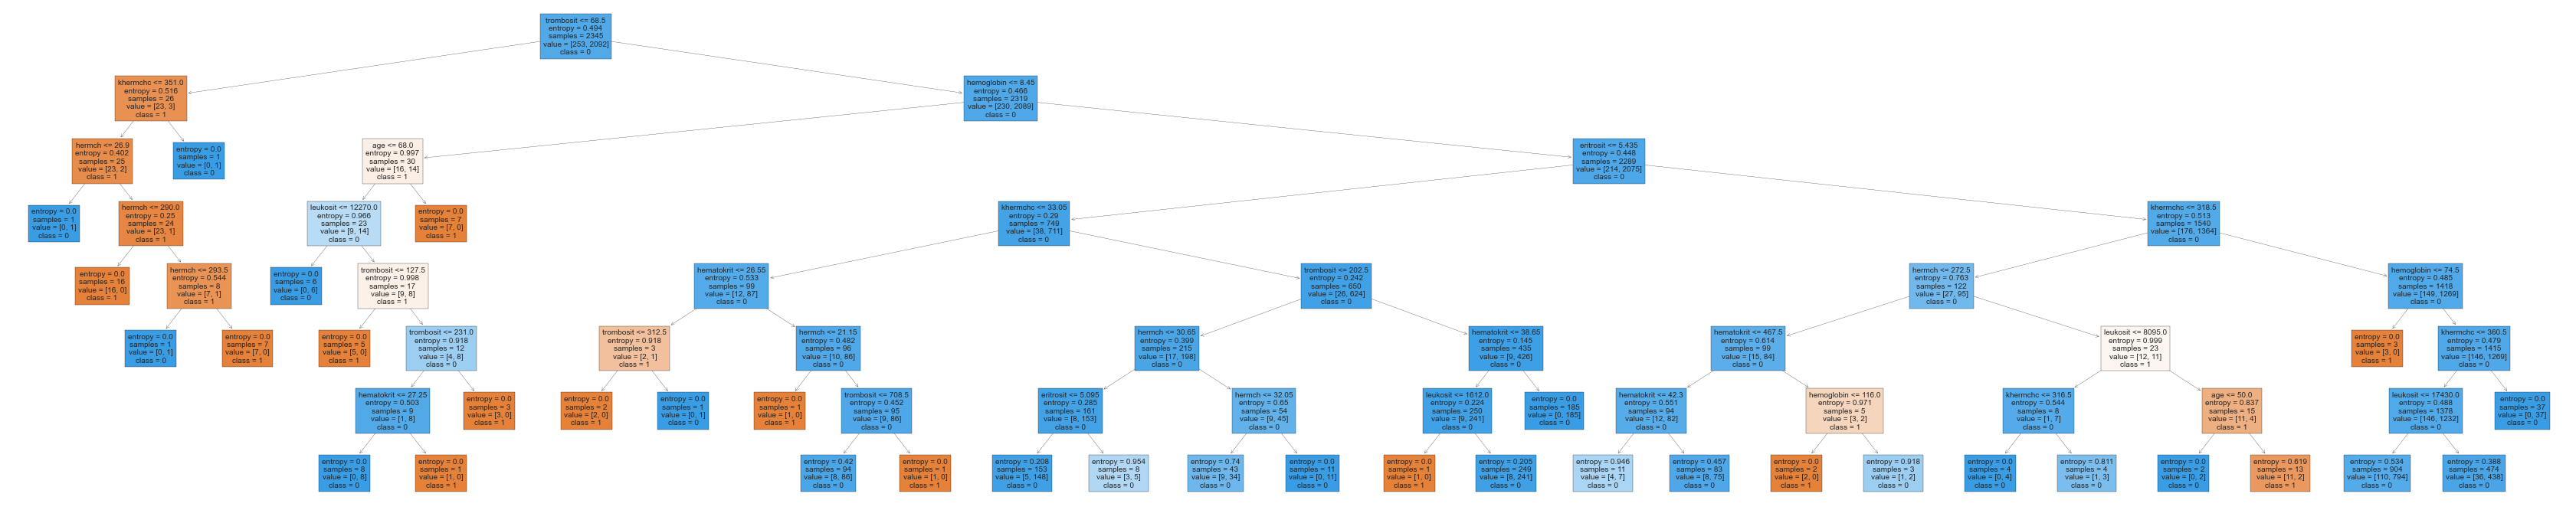

In [ ]:
plt.figure(figsize=(60,12),)
tree.plot_tree(clf,
               feature_names =fn,
               class_names=cn,
               fontsize =10,
               filled=True);
plt.savefig('treedecision-cured.pdf')

In [ ]:
print("Confusion matrix for train set")
print(m.confusion_matrix(y_train, predictions_train))
print("Accuracy",m.accuracy_score(y_train,predictions_train))
print("precision = ", m.precision_score(y_train, predictions_train, average="weighted"))
print("F Measure",m.f1_score(y_train,predictions_train))
print("Recall",m.recall_score(y_train,predictions_train), '\n')


predictions = clf.predict(x_test)
print("Confusion matrix for test set")
print(m.confusion_matrix(y_test, predictions_test))
print("Accuracy",m.accuracy_score(y_test,predictions_test))
print("Precision",m.precision_score(y_test,predictions_test, average='weighted'))
print("F Measure",m.f1_score(y_test,predictions_test))
print("Recall",m.recall_score(y_test,predictions_test))

Confusion matrix for train set
[[  60  193]
 [   2 2090]]
Accuracy 0.9168443496801706
precision =  0.9211025357898976
F Measure 0.9554285714285714
Recall 0.9990439770554493 

Confusion matrix for test set
[[  29  190]
 [  37 2090]]
Accuracy 0.9032395566922421
Precision 0.8721130744788034
F Measure 0.9484910369866122
Recall 0.9826046074283028


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


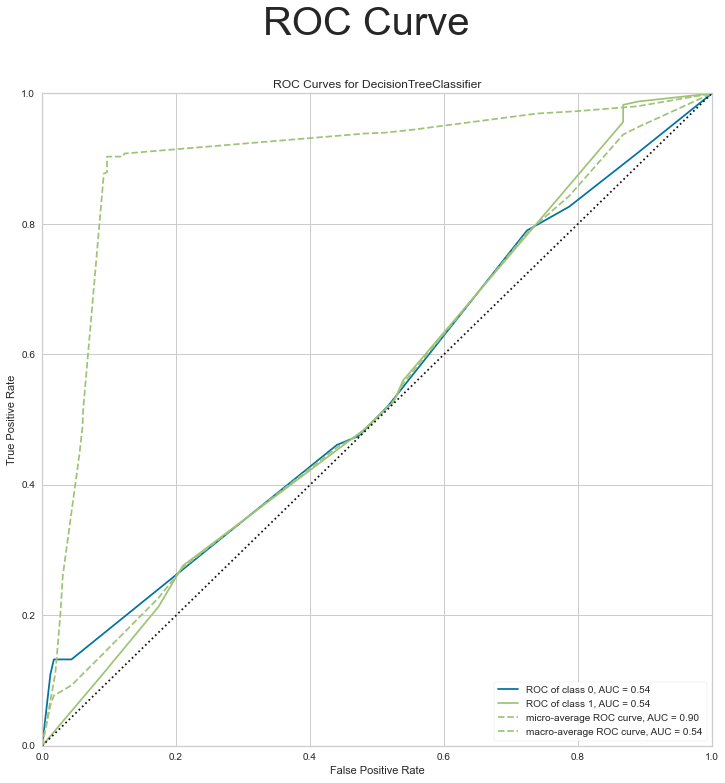

In [ ]:
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12));
fig.suptitle('ROC Curve', fontsize = 40)
roc_auc(clf, x_train, y_train, X_test = x_test, y_test = y_test, classes=[0,1], ax = ax)
fig.savefig('DTC-cured-ROC-AUC.pdf')